# Speed visualisation on track map

In [8]:
import sys
import fastf1
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

sys.path.append("../..")
from common import Config

In [2]:
fastf1.Cache.enable_cache(Config.FASTF1_CACHE_DIR)
fastf1.set_log_level('WARNING')

In [3]:
session = fastf1.get_session(2024, 'Bahrain', 'R')
weekend = session.event
session.load()

In [4]:
lap = session.laps.pick_driver('LEC').pick_fastest()

In [5]:
# Get telemetry data
x = lap.telemetry['X']
y = lap.telemetry['Y']
color = lap.telemetry['Speed']

Now, we create a set of line segments so that we can colour them individually. This creates the points as a `N x 1 x 2` array
so that we can stack points together easily to get the segments.

The segments array for line collection needs to be `(numlines) x (points per line) x 2` (for x and y).

In [7]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

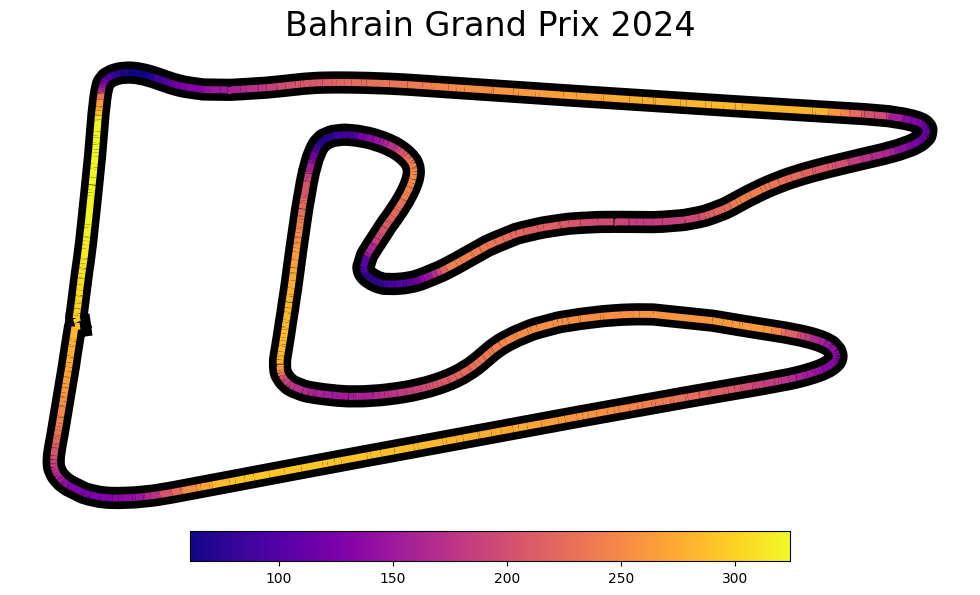

In [15]:
fig, ax = plt.subplots(figsize=(12, 6), sharex=True, sharey=True)
fig.suptitle(f"{weekend.EventName} {weekend.year}", size=24, y=0.97)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)  # Adjust margins and turn of axis
ax.axis('off')

# Background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colours
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=mpl.cm.plasma, norm=norm, linestyle='-', linewidth=5)
lc.set_array(color)  # Set the values used for colourmapping
line = ax.add_collection(lc)  # Merge all line segments together

# Finally, we create a colourbar as legend
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, cmap=mpl.cm.plasma, norm=normlegend, orientation='horizontal')

plt.show()